# Project: Investigate a Dataset - [No-Show Appointments.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

### Dataset Description 

We have a CSV file contains the data we are starting analyze.

folder Database_No_show_appointments

file name = noshowappointments-kagglev2-may-2016.csv

### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [26]:
# Import statment all packages then to use
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached https://files.pythonhosted.org/packages/1d/9a/7eb9952f4b4d73fbd75ad1d5d6112f407e695957444cb695cbb3cdab918a/pandas-0.25.0-cp36-cp36m-manylinux1_x86_64.whl


<a id='wrangling'></a>
## Data Wrangling

In This section .. I will load in the data set , check for cleanlines,anc then trim and clean dataset for analysis   


### General Properties

In [27]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
df.shape

(110527, 14)

DataSet consist 110527 raws(Appointment) , 14 columns

In [29]:
df.duplicated().sum()

0

No have a duplicated data of the raws 

In [30]:
df['PatientId'].duplicated().sum()

48228

we have 48228 duplicated ID 

In [31]:
df['PatientId'].nunique()

62299

we have 62299 patient out of 110527 are unique values 

In [32]:
# Check the duplicated patient Id and No_Show 
df.duplicated(['PatientId','No-show']).sum()

38710

we have 38710 patient id have the same no_show ... we will remove these in the cleanind data  

In [33]:
# check for the missing values or any issue
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing values

In [34]:
#check some information about our Data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


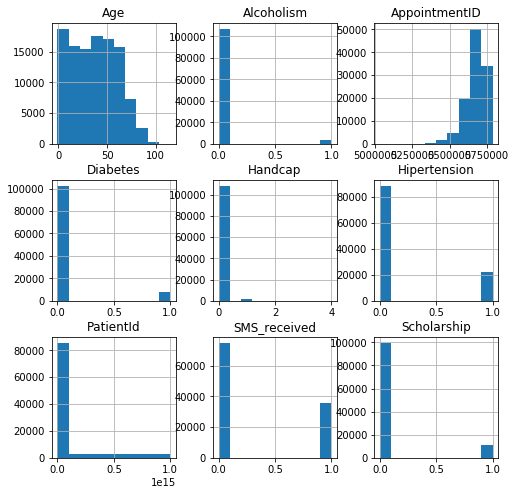

In [35]:
# getting some data visualization about our data 
df.hist(figsize = (8,8));

from these information ... we have mean age .. is 37  and min is -1 (we have a wrong value here i guess it was mistake) and i look our analysis about 50% of ages are between 18 and 55 years and we have a 25% of received SMS majority   

In [36]:
# check how many raw index of -1 value for age
wrong_age = df.query('Age== -1')
wrong_age 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


# Data Cleaning

In [37]:
# remove the wrong age ( -1 value ) 
df.drop(index = 99832 , inplace = True)

In [38]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [39]:
# correction of columns names 
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
df.rename(columns={'PatientId': 'PatientID'}, inplace=True)
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [40]:
# removing the duplicated IDs for patientID and No_show 
df.drop_duplicates(['PatientID','No_show'],inplace=True)
df.shape

(71816, 14)

In [41]:
# remove unuse Data 
df.drop(['PatientID', 'AppointmentID', 'AppointmentDay', 'ScheduledDay'], axis =1, inplace=True  )
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
Now we have a clean data, ready to move on to Exploration. 

# General look for dataset

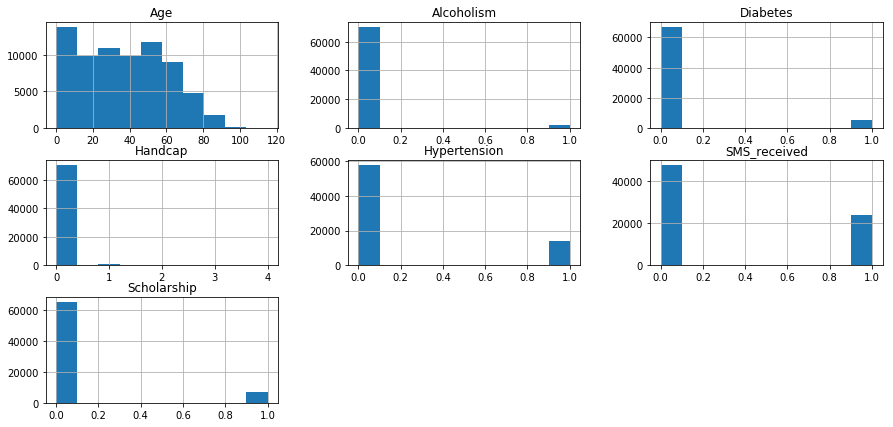

In [42]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,7));

In [43]:
# creat two groups for "show" , "NO show"
show_group = df.No_show == 'No'
noshow_group = df.No_show == 'Yes'
df[show_group].count(), df[noshow_group].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

The NO. of Showed patitients is 54153 and NO showed NO. 17663

In [44]:
df[show_group].mean(numeric_only=True),df[noshow_group].mean(numeric_only=True)

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

We see that the mean age of those who show is 37, and the mean age of those who did no show is 34. Those who received the most number of messages did no show And more for those who have Scholarship did no show (We need references for our messenger campaign).

# Examine the factors affecting attendance rate

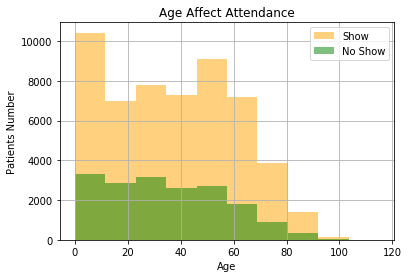

In [45]:
# does age affect attendance !!!!
def attendance(df, col_n, attend, absent): 
    df[col_n][attend].hist(alpha=.5, bins=10, color='orange', label='Show')
    df[col_n][absent].hist(alpha=.5, bins=10, color='green', label='No Show')
    plt.title(f'{col_n} Affect Attendance')
    plt.legend()
    plt.xlabel(col_n)
    plt.ylabel('Patients Number');
attendance(df, 'Age', show_group, noshow_group)

Most of the attendees are between the ages of 45 and 55

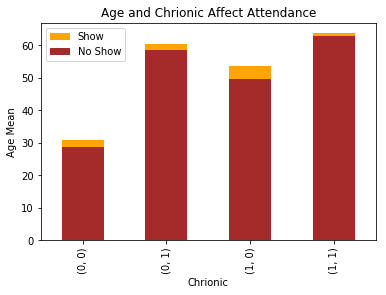

In [46]:
# The effect of age and chrionic on attendance
df[show_group].groupby(['Diabetes', 'Hypertension']).mean(numeric_only=True)['Age'].plot(kind='bar', color='orange', label='Show')
df[noshow_group].groupby(['Diabetes', 'Hypertension']).mean(numeric_only=True)['Age'].plot(kind='bar', color='brown', label='No Show')
plt.title('Age and Chrionic Affect Attendance')
plt.legend()
plt.xlabel('Chrionic')
plt.ylabel('Age Mean');

In [47]:
df[show_group].groupby(['Diabetes', 'Hypertension']).mean(numeric_only=True)['Age'], df[noshow_group].groupby(['Diabetes', 'Hypertension']).mean(numeric_only=True)['Age']

(Diabetes  Hypertension
 0         0               30.713360
           1               60.270517
 1         0               53.701370
           1               63.764303
 Name: Age, dtype: float64, Diabetes  Hypertension
 0         0               28.768691
           1               58.650380
 1         0               49.481172
           1               62.913282
 Name: Age, dtype: float64)

Chrionic factor is not affected in show or no show 

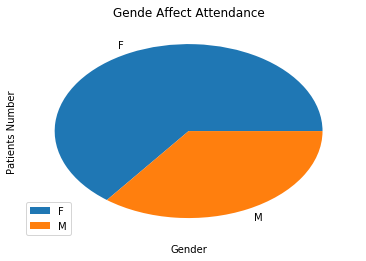

In [48]:
# What is the patient's gender affecting ?
def attendance2(df, col_n, attend, absent): 
    df[col_n][attend].value_counts(normalize=True).plot(kind='pie', label='Show')
    plt.title('Gende Affect Attendance')
    plt.legend()
    plt.xlabel('Gender')
    plt.ylabel('Patients Number');
attendance2(df, 'Gender', show_group, noshow_group)

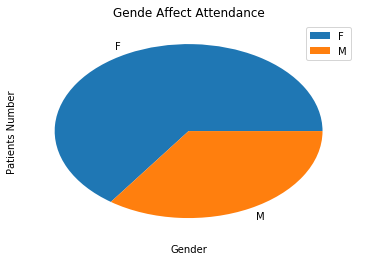

In [49]:
# What is the patient's gender affecting ?
def attendance2(df, col_n, attend, absent): 
    df[col_n][absent].value_counts(normalize=True).plot(kind='pie', label='Show')
    plt.title('Gende Affect Attendance')
    plt.legend()
    plt.xlabel('Gender')
    plt.ylabel('Patients Number');
attendance2(df, 'Gender', show_group, noshow_group)

Gender does not affect attendance

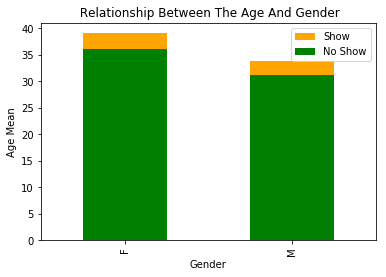

In [50]:
#Is there a relationship between the age and gender of the patient to affect his attendance 
df[show_group].groupby('Gender').Age.mean().plot(kind='bar', color= 'orange', label='Show')
df[noshow_group].groupby('Gender').Age.mean().plot(kind='bar', color= 'green', label='No Show')
plt.title(' Relationship Between The Age And Gender')
plt.legend()
plt.xlabel('Gender')
plt.ylabel('Age Mean');

In [51]:
df[show_group].groupby('Gender').Age.mean(), df[noshow_group].groupby('Gender').Age.mean()

(Gender
 F    39.130292
 M    33.766269
 Name: Age, dtype: float64, Gender
 F    36.06501
 M    31.22040
 Name: Age, dtype: float64)

In [52]:
df[show_group].groupby('Gender').Age.median(), df[noshow_group].groupby('Gender').Age.median()

(Gender
 F    39
 M    32
 Name: Age, dtype: int64, Gender
 F    34
 M    29
 Name: Age, dtype: int64)

the mean and the median of the Gender and age do not affect attendance

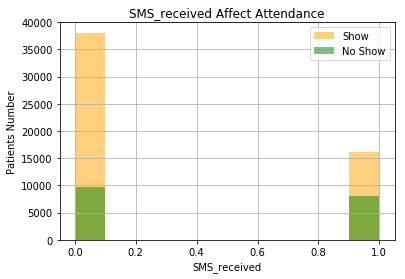

In [53]:
#The relationship of receiving messages to attend
attendance(df, 'SMS_received', show_group, noshow_group)

The number of those who show without receiving the letters is greater than those who did.. and a large number of those who did no show received the letters

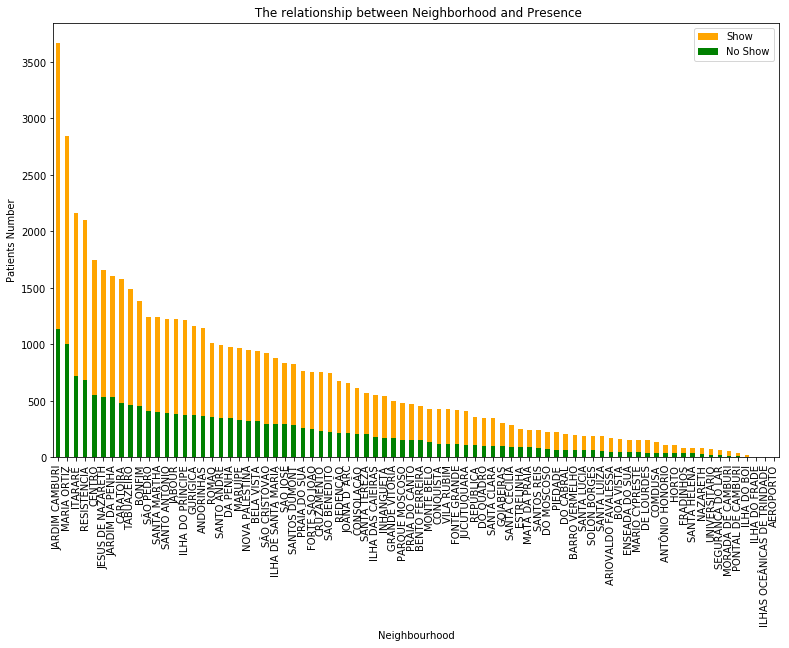

In [54]:
# The relationship between Neighborhood and Presence
plt.figure(figsize=[13,8])
df.Neighbourhood[show_group].value_counts().plot(kind='bar', color='orange', label='Show')
df.Neighbourhood[noshow_group].value_counts().plot(kind='bar', color='green', label='No Show')
plt.title(' The relationship between Neighborhood and Presence')
plt.legend()
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

There is an effect of presence through Neighborhood , (jardim camburi) has a greates number of patirnts 

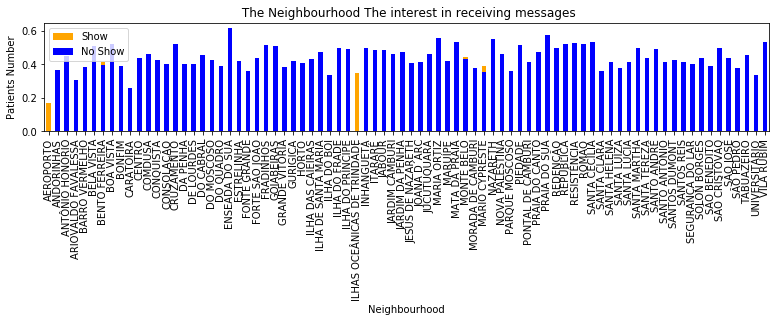

In [55]:
#The relationship between Neighbourhood and messaging mean
plt.figure(figsize=[13,2])
df[show_group].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='orange', label='Show')
df[noshow_group].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='blue', label='No Show')
plt.title(' The Neighbourhood The interest in receiving messages')
plt.legend()
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

There is a significant relationship between Messages and Neighborhood in some provinces (Aeroportp,ilhas,mario,monte belo,bento ferreire) There are a large number of Neighborhood who received the letters and did not no show 

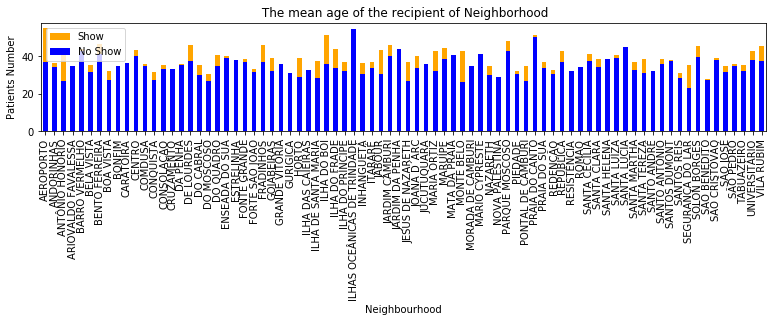

In [56]:
#The mean age of the recipient of Neighborhood
plt.figure(figsize=[13,2])
df[show_group].groupby('Neighbourhood').Age.mean().plot(kind='bar', color='orange', label='Show')
df[noshow_group].groupby('Neighbourhood').Age.mean().plot(kind='bar', color='blue', label='No Show')
plt.title(' The mean age of the recipient of Neighborhood')
plt.legend()
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

The number of ages is ineffective except in one neighborhood AEROPORTO more than the rest

<a id='conclusions'></a>
## Conclusions

the neighborhood has a great effect on attendance or not, JARDIM CAMBURI has the greatest number of patients and also has the greatest showing of rat.

There is a significant relationship between Messages and Neighborhood in some provinces (Aeroportp,ilhas,mario,monte belo,bento ferreire) There are a large number of Neighborhood who received the letters and did not no show.

The ages from the first 0 : 8 are linked to the ages of his parents ... and who
45 : 55 is considered the average attendance , and most of the attendance is higher than 65

The number of attendees without messages is greater than the number of attendees receiving messages

Attendance is not related to Scholarship



# limitations 

There is no clear association between showe and gender, chronic disease and enrollment in a welfare programme

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0